In [1]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
})

# Exe 1

In [2]:
# variance levels (tau^2)
tau2levels = np.linspace(.1,10,40)

# simulation parameters
samplesize = 200
numsamples =  20

# initialize results matrix
results = np.zeros((numsamples,len(tau2levels),2))

In [3]:
# run the experiment
# loop over tau levels
for ni,tau2 in enumerate(tau2levels):

  # repeat for multiple samples
  for sampi in range(numsamples):

    # generate sample data with tau modulation
    data = np.random.normal(0,np.sqrt(tau2),size=samplesize)

    # store sample mean and variance
    results[sampi,ni,0] = np.mean(data)
    results[sampi,ni,1] = np.var(data,ddof=1)

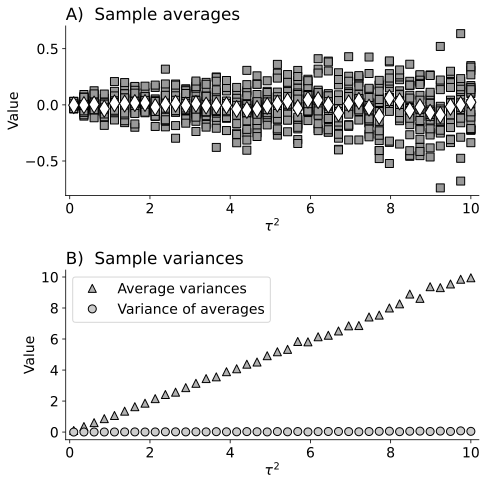

In [4]:
# plotting
_,axs = plt.subplots(2,1,figsize=(7,7))

# plot the average of the sample means
axs[0].plot(np.tile(tau2levels,(20,1)),results[:,:,0],'ks',
            markerfacecolor=(.6,.6,.6),markersize=8)
axs[0].plot(tau2levels,np.mean(results[:,:,0],axis=0),'kd',
            markerfacecolor='w',markersize=12)
axs[0].set_title(r'A)  Sample averages')

# plot the average within-sample variances
axs[1].plot(tau2levels,np.mean(results[:,:,1],axis=0),'k^',
            markerfacecolor=(.7,.7,.7),markersize=8,label='Average variances')

# plot the average across-sample variance of the sample means
axs[1].plot(tau2levels,np.var(results[:,:,0],axis=0,ddof=1),'ko',
            markerfacecolor=(.8,.8,.8),markersize=8,label='Variance of averages')
axs[1].set_title(r'B)  Sample variances')
axs[1].legend()

for a in axs:
  a.set(xlabel=r'$\tau^2$',ylabel='Value',
        xlim=[tau2levels[0]-.2,tau2levels[-1]+.2])


# display the figure
plt.tight_layout()
plt.show()

# Exe 2

In [5]:
# the sample sizes
samplesizes = np.arange(10,1001)

# generate population data with known std
pop_std     = 2.4
populationN = 1000000
population  = np.random.randn(populationN)
population  = population / np.std(population,ddof=1) # force std=1
population  = population * pop_std # force std


# initialize results matrix
samplestds = np.zeros(len(samplesizes))

# run the experiment
for sampi in range(len(samplesizes)):

  # pick a random sample
  sample = np.random.choice(population,size=samplesizes[sampi])
  samplestds[sampi] = np.std(sample,ddof=1)

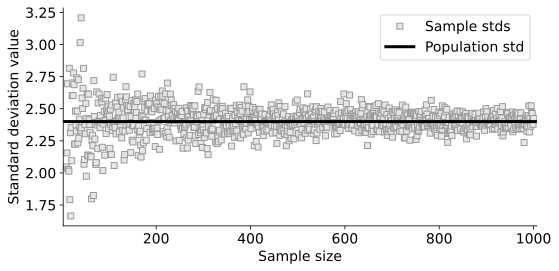

In [6]:
# show the results!
plt.figure(figsize=(8,4))
plt.plot(samplesizes,samplestds,'s',markerfacecolor=(.9,.9,.9),color=(.6,.6,.6))
plt.axhline(pop_std,color='k',linewidth=3)
plt.xlabel('Sample size')
plt.ylabel('Standard deviation value')
plt.xlim([samplesizes[0]-7,samplesizes[-1]+7])
plt.legend(('Sample stds','Population std'))

# display the figure
plt.tight_layout()
plt.show()

# Exe 3

In [7]:
# parameters
popMean1 = 3
popMean2 = 3.2


# generate populations
population1 = np.random.randn(populationN)
population1 = population1 - np.mean(population1) + popMean1

population2 = np.random.randn(populationN)
population2 = population2 - np.mean(population2) + popMean2

# one sample
s1 = np.mean( np.random.choice(population1,size=30) )
s2 = np.mean( np.random.choice(population2,size=30) )

print(f'Population difference: {popMean1-popMean2:.3f}')
print(f'Sample difference:     {s1-s2:.3f}')

Population difference: -0.200
Sample difference:     -0.275


In [8]:
# initialize results matrix
samplediffs = np.zeros(len(samplesizes))

# run the experiment
for sampi in range(len(samplesizes)):

  # pick a random sample
  s1 = np.random.choice(population1,size=samplesizes[sampi])
  s2 = np.random.choice(population2,size=samplesizes[sampi])
  samplediffs[sampi] = np.mean(s1) - np.mean(s2)

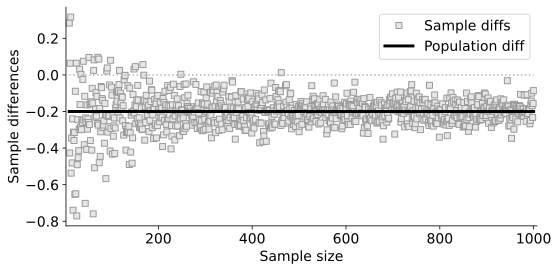

In [9]:
# plot
plt.figure(figsize=(8,4))
plt.plot(samplesizes,samplediffs,'s',markerfacecolor=(.9,.9,.9),color=(.6,.6,.6))
plt.plot(samplesizes[[0,-1]],[popMean1-popMean2,popMean1-popMean2],'k',linewidth=3)
plt.plot(samplesizes[[0,-1]],[0,0],color=(.7,.7,.7),linestyle=':')

plt.xlabel('Sample size')
plt.ylabel('Sample differences')
plt.xlim([samplesizes[0]-7,samplesizes[-1]+7])
plt.legend(('Sample diffs','Population diff'))

# display the figure
plt.tight_layout()
plt.show()

# Exe 4

In [10]:
N = 1200
numbers = np.zeros((N,3))

for i in range(N):
  nums = np.random.choice(range(100),2)
  numbers[i,0] = nums[0]
  numbers[i,1] = nums[1]
  numbers[i,2] = np.mean(nums)


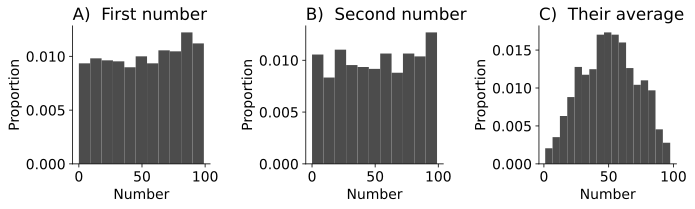

In [11]:
# plot
_,axs = plt.subplots(1,3,figsize=(10,np.pi))


for i in range(3):
  axs[i].hist(numbers[:,i],bins='fd',color=(.3,.3,.3),density=True)
  axs[i].set(xlabel='Number',ylabel='Proportion')


axs[0].set_title(r'A)  First number',loc='left')
axs[1].set_title(r'B)  Second number',loc='left')
axs[2].set_title(r'C)  Their average',loc='left')

# display the figure
plt.tight_layout()
plt.show()

# Exe 6

In [12]:
# population of random numbers
Npop = 1000000
population = np.random.randn(Npop)**2


# parameters and initializations
samplesizes   = np.arange(5,500,8)
numberOfsamps = 1000
samplemeans   = np.zeros(numberOfsamps)
fwhms         = np.zeros(len(samplesizes))
peakvals      = np.zeros(len(samplesizes))

# line colors
c = np.linspace((.9,.9,.9),(0,0,0),len(samplesizes))

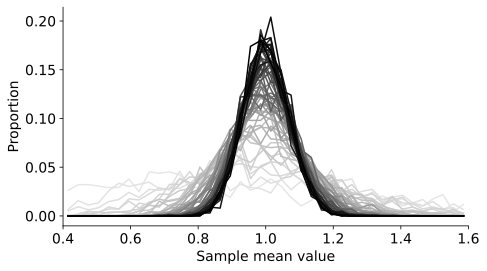

In [13]:
# the experiment!
plt.figure(figsize=(7,4))
for Ns in range(len(samplesizes)):

  # compute the means of lots of samples
  for expi in range(numberOfsamps):
    samplemeans[expi] = np.mean( np.random.choice(population,size=samplesizes[Ns]) )


  # make a histogram of those means
  yy,xx = np.histogram(samplemeans,np.linspace(.4,1.6,41))
  yy = yy/np.sum(yy)

  # compute FWHM
  # step 1: normalize
  yn = yy/np.max(yy)

  # step 2: find peak index
  idx = np.argmax(yn)

  # step 3: compute FWHM
  fwhms[Ns] = xx[idx-1+np.argmin(np.abs(yn[idx:]-.5))] - xx[np.argmin(np.abs(yn[:idx]-.5))]

  # also store mean value
  peakvals[Ns] = xx[idx]

  # plot
  plt.plot((xx[:-1]+xx[1:])/2,yy,color=c[Ns])


plt.xlim([.4,1.6])
plt.xlabel('Sample mean value')
plt.ylabel('Proportion')

# display the figure
plt.tight_layout()
plt.show()

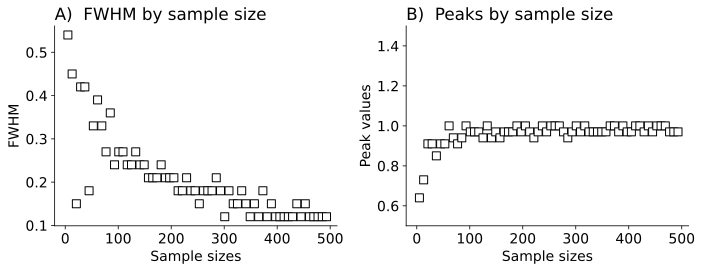

In [14]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4))

axs[0].plot(samplesizes,fwhms,'ks',markerfacecolor='w',markersize=8)
axs[0].set(xlabel='Sample sizes',ylabel='FWHM',xlim=[-20,samplesizes[-1]+20])
axs[0].set_title(r'A)  FWHM by sample size')

axs[1].plot(samplesizes,peakvals,'ks',markerfacecolor='w',markersize=8)
axs[1].set(xlabel='Sample sizes',ylabel='Peak values',ylim=[.5,1.5],xlim=[-20,samplesizes[-1]+20])
axs[1].set_title(r'B)  Peaks by sample size')

# display the figure
plt.tight_layout()
plt.show()

# Exe 7

In [15]:
# population of random numbers
Npop = 1000000
population = np.random.randn(Npop)**2


# experiment parameters
samplesizes = np.logspace(np.log10(10),np.log10(Npop/10),25,dtype=int)
numExps = 50


# theoretical standard error based on population standard deviation
theory = np.std(population) / np.sqrt(samplesizes)

# initialize the empirical estimates
standerror = np.zeros((numExps,len(samplesizes)))
samplemeans = np.zeros((numExps,len(samplesizes)))


# the experiment
for expi in range(numExps):
  for idx,ssize in enumerate(samplesizes):

    # generate a random sample
    rsample = np.random.choice(population,size=ssize)

    # compute its standard error (estimate) and the sample mean
    standerror[expi,idx] = np.std(rsample,ddof=1) / np.sqrt(ssize)
    samplemeans[expi,idx] = np.mean(rsample)

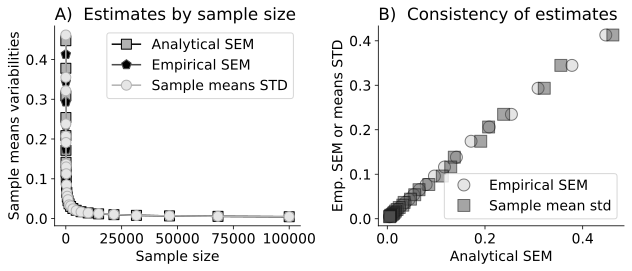

In [16]:
# plot
_,axs = plt.subplots(1,2,figsize=(9,4))

axs[0].plot(samplesizes,theory,'ks-',markersize=10,markerfacecolor=(.7,.7,.7),label='Analytical SEM')
axs[0].plot(samplesizes,np.mean(standerror,axis=0),'p-',color=(.3,.3,.3),
            markersize=10,markerfacecolor=(0,0,0),label='Empirical SEM')
axs[0].plot(samplesizes,np.std(samplemeans,axis=0,ddof=1),'o-',color=(.7,.7,.7),
            markersize=10,markerfacecolor=(.9,.9,.9),label='Sample means STD')
axs[0].set(xlabel='Sample size',ylabel='Sample means variabilities')
axs[0].legend()
axs[0].set_title(r'A)  Estimates by sample size')

axs[1].plot(theory,np.mean(standerror,axis=0),'ko',markerfacecolor=(.8,.8,.8),markersize=12,alpha=.5,label='Empirical SEM')
axs[1].plot(np.std(samplemeans,axis=0,ddof=1),np.mean(standerror,axis=0),'ks',markerfacecolor=(.3,.3,.3),markersize=12,alpha=.5,label='Sample mean std')
axs[1].set(xlabel='Analytical SEM',ylabel=r'Emp. SEM or means STD')
axs[1].legend()
axs[1].set_title(r'B)  Consistency of estimates')

# display the figure
plt.tight_layout()
plt.show()